In [123]:
!pip install pythainlp
!pip install pyLDAvis

In [124]:
pip uninstall numpy

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.25.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? y
  Successfully uninstalled numpy-1.25.2


In [125]:
pip install numpy==1.22

  Using cached numpy-1.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
librosa 0.10.1 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.
plotnine 0.12.2 requires numpy>=1.23.0, but you have numpy 1.22.0 which is incompatible.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.22.0 which is incompatible.


In [126]:
import pandas as pd
import numpy as np
import pythainlp
import gensim
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [127]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.aq1C3tLAUl/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.XpJ4SnS6fn/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.BwCbcqEVEV/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [128]:
!apt-get update
!apt-get upgrade
!apt-get install -y unzip xvfb libxi6 libgconf-2-4
!pip install pyvirtualdisplay
!pip install xvfbwrapper

# Download and install the compatible version of ChromeDriver
!wget https://chromedriver.storage.googleapis.com/90.0.4430.24/chromedriver_linux64.zip
#!wget https://chromedriver.storage.googleapis.com/116.0.5845.36/chromedriver_linux64.zip
!unzip chromedriver_linux64.zip
!chmod +x chromedriver
!mv chromedriver /usr/local/bin

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian buster-updates InRelease
Hit:3 http://deb.debian.org/debian-security buster/updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:10 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
#loading data
path = '/content/review.xlsx'
df = pd.read_excel(path)

In [131]:
df.head()

,Review_id,Review
0,1,มีที่จอดรถเยอะ -พนักงาน​ต้อนรับ​ยิ้มแย้ม -แม่บ...
1,2,เดินทางไปพักคนเดียว ห้องใหญ่ แต่หมอนแอบสูงไปนิ...
2,3,ที่พักสะอาด ตั้งอยู่ในทำเลที่ดี มีตลาดเมืองทอง...
3,4,ที่พักดี สะดวก สะอาด ที่จอดรถเยอะ มีตาข่ายกันน...
4,5,พนักงานเป็นมิตรดี มีขนมปัง ชา กาแฟ บริการฟรีตอ...


In [132]:
!pip install --upgrade pip
!pip install --upgrade gensim
!pip install --upgrade pyLDAvis


  Obtaining dependency information for numpy>=1.24.2 from https://files.pythonhosted.org/packages/71/3c/3b1981c6a1986adc9ee7db760c0c34ea5b14ac3da9ecfcf1ea2a4ec6c398/numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


In [133]:
from pythainlp import word_tokenize, Tokenizer
from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie

In [134]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [151]:
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = [' ','  ','\n','(',')','ราชบุรี','เมือง','ร้าน','ค่ะ','คะ','ๆ','มี','และ','รร.','ลูกค้า','ๆๆ','ค่','-','อำเภอ','ราชรี','บุรี','กาแฟ','นั่ง','ดี','กก','ถาม','นก','',' ','12','/']
screening_words = stopwords + removed_words

existing_words = set(thai_words())
words = {'ราคาถูก','ราคาแพง','คุ้มค่า','สงบ','สไสตส์','มากกก','ไม่มี','รถส่วนตัว','แหล่งท่งเที่ยว','สะพานบุญ','ไม่ได้','อีกรอบ','เหใาะสม','อพำนวย','สงบดี','ราคาที่','น่านั่ง', ' '}
custom_dict = existing_words.union(words)

custom_dictionary_trie = Trie(custom_dict)

def tokenize_with_comma(sentence):
  merged = ''
  words = pythainlp.word_tokenize(str(sentence), engine = 'newmm',custom_dict = custom_dictionary_trie)
  print(words)
  for word in words:
    if word not in screening_words:
      merged = merged + ',' + word
  return merged[1:]

In [152]:
df['Review_tokenized'] = df['Review'].apply(lambda x: tokenize_with_comma(x))
df.head()

['มี', 'ที่จอดรถ', 'เยอะ', ' ', '-', 'พนักงาน', '\u200b', 'ต้อนรับ', '\u200b', 'ยิ้มแย้ม', ' ', '-', 'แม่บ้าน', 'น่ารัก', '\u200b', 'คะ', '\u200b', ' ', 'รีโมต', '\u200b', 'ที่', 'ห้อง', 'ไม่', 'สามารถ', '\u200b', 'เปลี่ยน', '\u200b', 'ช่อง', 'ได้', '\u200b', ' ', 'แม่บ้าน', 'ช่วย', 'ทำให้', 'ใช้งาน', '\u200b', 'ได้', ' ', '-', 'ห้องพัก', 'กว้างขวาง', ' ', '-', 'ห้องน้ำ', 'แบ่ง', 'ป็น', 'โซน', 'ดี', 'คะ']
['เดินทาง', 'ไป', 'พัก', 'คนเดียว', ' ', 'ห้อง', 'ใหญ่', ' ', 'แต่', 'หมอน', 'แอบ', 'สูง', 'ไป', 'นิด', ' ', 'มี', 'พื้นที่', 'แยก', 'เป็น', 'ห้องนั่งเล่น', 'และ', 'ห้องนอน', ' ', 'ดูดี', 'เลย', ' ', 'ไว้', 'ไป', 'พัก', 'อีก', ' ', 'เสียดาย', 'ไม่มี', 'อาหารเช้า']
['ที่พัก', 'สะอาด', ' ', 'ตั้งอยู่', 'ใน', 'ทำเล', 'ที่', 'ดี', ' ', 'มี', 'ตลาด', 'เมือง', 'ทอง', 'อยู่', 'ใน', 'ระยะใกล้', ' ', 'ห้อง', 'ใหญ่', ' ', 'แบ่ง', 'สัดส่วน', 'เป็น', 'ห้องนอน', 'และ', 'ห้องนั่งเล่น', ' ', 'แนะนำ', 'ครับ']
['ที่พัก', 'ดี', ' ', 'สะดวก', ' ', 'สะอาด', ' ', 'ที่จอดรถ', 'เยอะ', ' ', 'มี', 'ตาข่าย', '

,Review_id,Review,Review_tokenized,topics,score
0,1,มีที่จอดรถเยอะ -พนักงาน​ต้อนรับ​ยิ้มแย้ม -แม่บ...,"ที่จอดรถ,พนักงาน,​,ต้อนรับ,​,ยิ้มแย้ม,แม่บ้าน,...",0,0.993749
1,2,เดินทางไปพักคนเดียว ห้องใหญ่ แต่หมอนแอบสูงไปนิ...,"เดินทาง,พัก,คนเดียว,ห้อง,หมอน,แอบ,พื้นที่,แยก,...",2,0.990169
2,3,ที่พักสะอาด ตั้งอยู่ในทำเลที่ดี มีตลาดเมืองทอง...,"ที่พัก,สะอาด,ตั้งอยู่,ทำเล,ตลาด,ทอง,ระยะใกล้,ห...",0,0.988071
3,4,ที่พักดี สะดวก สะอาด ที่จอดรถเยอะ มีตาข่ายกันน...,"ที่พัก,สะดวก,สะอาด,ที่จอดรถ,ตาข่าย,ส้วม,เต็ม,ก...",2,0.992950
4,5,พนักงานเป็นมิตรดี มีขนมปัง ชา กาแฟ บริการฟรีตอ...,"พนักงาน,เป็นมิตร,ขนมปัง,ชา,บริการ,ฟรี,ตอนเช้า,...",0,0.998362


Create Dictionary

In [154]:
documents = df['Review_tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)
print(dictionary.token2id.keys())

dict_keys(['ช่อง', 'ต้อนรับ', 'ที่จอดรถ', 'น่ารัก', 'ป็น', 'พนักงาน', 'ยิ้มแย้ม', 'รีโมต', 'ห้อง', 'ห้องน้ำ', 'ห้องพัก', 'แบ่ง', 'แม่บ้าน', 'โซน', 'ใช้งาน', '\u200b', 'คนเดียว', 'ดูดี', 'พัก', 'พื้นที่', 'หมอน', 'ห้องนอน', 'ห้องนั่งเล่น', 'อาหารเช้า', 'เดินทาง', 'เสียดาย', 'แยก', 'แอบ', 'ไม่มี', 'ตลาด', 'ตั้งอยู่', 'ทอง', 'ทำเล', 'ที่พัก', 'ระยะใกล้', 'สะอาด', 'สัดส่วน', 'แนะนำ', '106', 'กด', 'ดู', 'ตอน', 'ตาข่าย', 'ถ่าย', 'นะคะ', 'ฝาก', 'ลำบาก', 'ลืม', 'สะดวก', 'ส้วม', 'หนัก', 'เช็ค', 'เต็ม', 'เอ้าท์', 'แจ้ง', '', '2', 'lobby', 'room', 'service', 'suites', 'กลับมา', 'กลาง', 'ขนม', 'ขนมปัง', 'ขนาด', 'ของกินของใช้', 'ของใช้', 'คน', 'ครีม', 'ง', 'จอง', 'ชา', 'ซื้อ', 'ดื่ม', 'ตอนเช้า', 'ตัวเมือง', 'ติด', 'ตู้เย็น', 'ถนน', 'ถนนใหญ่', 'น้ำอุ่น', 'บริการ', 'บริเวณ', 'บายพาส', 'ผ้าเช็ดตัว', 'ฟรี', 'มีปัญหา', 'มีโอกาส', 'รถยนต์', 'รอบ', 'ราคา', 'ราคาที่', 'ร้อย', 'ร้านอาหาร', 'สั่งอาหาร', 'สำหรับ', 'สี่', 'ส่วนตัว', 'หมวก', 'หลัก', 'หา', 'ออกมา', 'อาบน้ำ', 'อึดอัด', 'เก่า', 'เครือ', 'เดิน', 'เ

In [155]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
word_frequencies = [[(dictionary[id],frequence) for id, frequence in couple] for couple in gensim_corpus]

In [156]:
num_topics = 50
chunksize = 4000
passes = 20
iterations = 50
eval_every = 1

temp = dictionary[0]
id2word = dictionary.id2token

#%time model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, alpha = 'auto', eta = 'auto', iterations=iterations, num_topics = num_topics, passes=passes, eval_every=eval_every)

In [157]:
from gensim import models

n_topics = 3
model = models.LdaModel(corpus=gensim_corpus, num_topics=n_topics, id2word=id2word, chunksize=chunksize, alpha = 'auto', eta = 'auto', iterations=iterations,passes=passes,eval_every=eval_every)
#model = models.LdaModel(corpus=gensim_corpus, num_topics=n_topics

In [158]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, gensim_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.091866 -0.029991       1        1  44.988591
1     -0.078944 -0.047601       2        1  37.657857
0     -0.012922  0.077592       3        1  17.353552, topic_info=        Term       Freq      Total Category  logprob  loglift
32      ทำเล   3.000000   3.000000  Default  30.0000  30.0000
91      ราคา  12.000000  12.000000  Default  29.0000  29.0000
15         ​   7.000000   7.000000  Default  28.0000  28.0000
35     สะอาด  20.000000  20.000000  Default  27.0000  27.0000
127     คุ้ม   5.000000   5.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
82    บริการ   0.659519   3.955125   Topic3  -5.0140  -0.0399
56         2   0.659471   1.842043   Topic3  -5.0141   0.7242
77       ติด   0.659446   1.842052   Topic3  -5.0141   0.7241
98   ส่วนตัว   0.659423   1.842061   Topic3  -5.0142   0.7241
42    ตาข่าย   0.659412   1.802804   Topic3  -5.0142   0.7456

[180 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
55        1  0.968551          
254       2  0.764384         1
56        1  0.542876         2
56        3  0.542876         2
255       2  0.764384      2020
...     ...       ...       ...
126       2  0.764382  ไปเที่ยว
28        1  0.473176     ไม่มี
28        2  0.236588     ไม่มี
28        3  0.473176     ไม่มี
15        1  0.987684         ​

[165 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [159]:
model.show_topic(0)

[('สะอาด', 0.035837434),
 ('ทำเล', 0.026563304),
 ('ห้อง', 0.020065958),
 ('พัก', 0.016612573),
 ('ไม่มี', 0.016610164),
 ('ที่จอดรถ', 0.016607404),
 ('เดินทาง', 0.011626027),
 ('เ', 0.011625522),
 ('โรงแรม', 0.011625384),
 ('ดูดี', 0.01162537)]

In [160]:
model.show_topic(1)


[('สะอาด', 0.05458544),
 ('ราคา', 0.041959025),
 ('ห้อง', 0.029388344),
 ('ห้องพัก', 0.0256688),
 ('พัก', 0.023090197),
 ('คุ้ม', 0.023047004),
 ('สะดวก', 0.013645772),
 ('พนักงาน', 0.013642952),
 ('ที่พัก', 0.010496335),
 ('ประหยัด', 0.010494558)]

In [161]:
model.show_topic(2)


[('ห้อง', 0.029661052),
 ('\u200b', 0.026021935),
 ('ห้องพัก', 0.02601935),
 ('สะอาด', 0.020827588),
 ('พนักงาน', 0.017655274),
 ('พัก', 0.017654082),
 ('สัดส่วน', 0.01729879),
 ('แบ่ง', 0.014367532),
 ('ห้องนอน', 0.012884842),
 ('โรงแรม', 0.012082862)]

In [162]:
df['topics'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

# **WordCloud**

In [163]:
from wordcloud import WordCloud
!wget https://github.com/Superbom99/MADT8101-SEMINAR-IN-ADVANCED-ANALYTICS/blob/8830a51f9d11f18ee0c1900557d7e168bfa949ed/Workshop%206%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf

--2023-08-28 09:18:37--  https://github.com/Superbom99/MADT8101-SEMINAR-IN-ADVANCED-ANALYTICS/blob/8830a51f9d11f18ee0c1900557d7e168bfa949ed/Workshop%206%20-%20Voice%20of%20Customer%20Analytics/TH%20Sarabun%20New%20Regular.ttf
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6161 (6.0K) [text/plain]
Saving to: ‘TH Sarabun New Regular.ttf.5’

TH Sarabun New Regu 100%[===================>]   6.02K  --.-KB/s    in 0s      

2023-08-28 09:18:37 (53.6 MB/s) - ‘TH Sarabun New Regular.ttf.5’ saved [6161/6161]



In [164]:
from PIL import ImageFont

font_path = "TH Sarabun New Regular.ttf"
try:
    font = ImageFont.truetype(font_path, size=12)
except Exception as e:
    print("Font loading error:", e)

In [165]:
regexp = r"[ก-๙a-zA-Z']+"
long_string = ','.join(list(df['Review_tokenized'].values))
#wordcloud = WordCloud(font_path = gdrive_path + 'TH Sarabun New Regular.ttf',background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000,regexp="[ก-๙a-zA-Z']+")
wordcloud = WordCloud(font_path = 'TH Sarabun New Regular.ttf',background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000, regexp=r"[ก-๙a-zA-Z']+")
wordcloud.generate(long_string)

In [166]:
print(long_string)

ที่จอดรถ,พนักงาน,​,ต้อนรับ,​,ยิ้มแย้ม,แม่บ้าน,น่ารัก,​,​,รีโมต,​,ห้อง,​,​,ช่อง,​,แม่บ้าน,ใช้งาน,​,ห้องพัก,ห้องน้ำ,แบ่ง,ป็น,โซน,เดินทาง,พัก,คนเดียว,ห้อง,หมอน,แอบ,พื้นที่,แยก,ห้องนั่งเล่น,ห้องนอน,ดูดี,พัก,เสียดาย,ไม่มี,อาหารเช้า,ที่พัก,สะอาด,ตั้งอยู่,ทำเล,ตลาด,ทอง,ระยะใกล้,ห้อง,แบ่ง,สัดส่วน,ห้องนอน,ห้องนั่งเล่น,แนะนำ,ที่พัก,สะดวก,สะอาด,ที่จอดรถ,ตาข่าย,ส้วม,เต็ม,กด,ถ่าย,หนัก,ลำบาก,ฝาก,ดู,นะคะ,ห้อง,106,ตอน,เช็ค,เอ้าท์,ลืม,แจ้ง,พนักงาน,เป็นมิตร,ขนมปัง,ชา,บริการ,ฟรี,ตอนเช้า,เลือก,จอง,ห้อง,suites,ห้องนั่งเล่น,แยก,ห้องนอน,ห้อง,ขนาด,สัดส่วน,พัก,2,คน,อึดอัด,แอร์,เย็นฉ่ำ,ห้องนอน,ห้องนอน,น้ำอุ่น,ห้อง,สะอาด,ตู้เย็น,ขนาด,กลาง,แชมพู,,,ครีม,อาบน้ำ,หมวก,อาบน้ำ,ผ้าเช็ดตัว,เก่า,โอเค,สำหรับ,ราคา,ห้อง,หลัก,ร้อย,จอง,โปร,เที่ยว,ราคา,ห้อง,สี่,ร้อย,รอบ,โรงแรม,ไม่มี,สะดวก,ซื้อ,บริเวณ,lobby,ขนม,เครือ,ง,ดื่ม,ของใช้,เลือก,ซื้อ,ร้านอาหาร,เดิน,ออกมา,ถนนใหญ่,โรงแรม,room,service,สั่งอาหาร,ราคาที่,ไม่ได้,แพง,รถยนต์,ส่วนตัว,มีปัญหา,หา,ซื้อ,ของกินของใช้,โรงแรม,ตั้งอยู่,ตัวเมือง,เดินทาง,สะดวก,ติด,ถนน,บายพาส,มีโอกาส,กลับมา

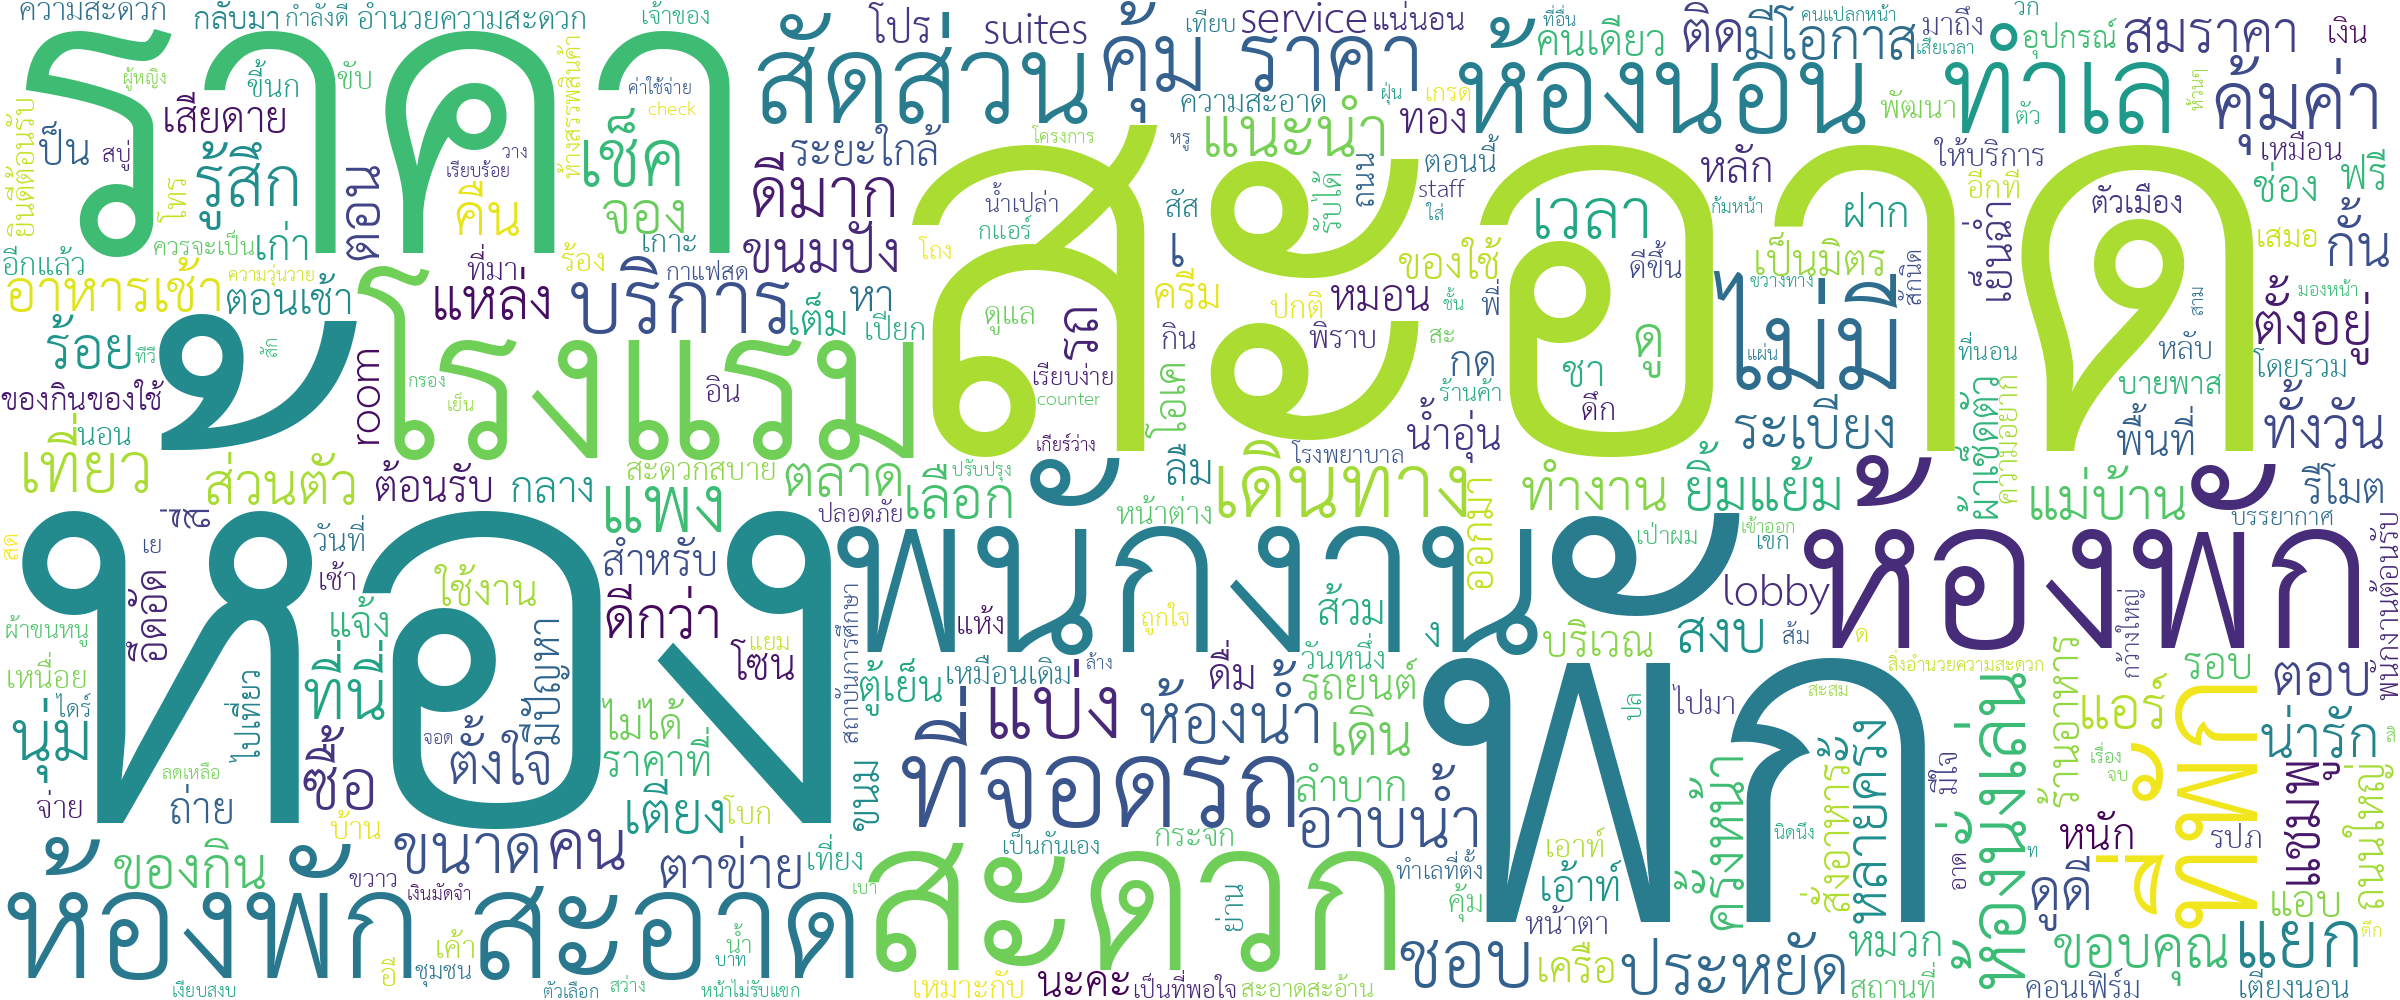

In [167]:
wordcloud.to_image()